# Data preprocessing

In [ ]:
#import the liberaries that we need for analysis
import pandas as pd                  #for dealing with dataframs
import numpy as np                   #for scientific compution and arraies
import matplotlib.pyplot as plt      #for visualization
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML project/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

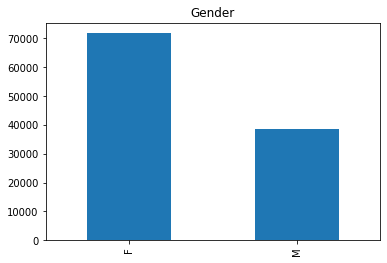

In [ ]:
df['Gender'].value_counts().plot.bar(title='Gender')

In [ ]:
df = df.replace({
    'Gender': {'M': 1, 'F': 0},
})

In [ ]:
df = df.replace({ 'No-show': {'Yes': 1, 'No': 0},})

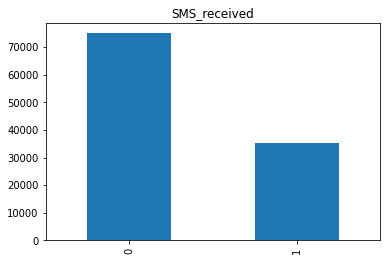

In [ ]:
df['SMS_received'].value_counts().plot.bar(title='SMS_received')

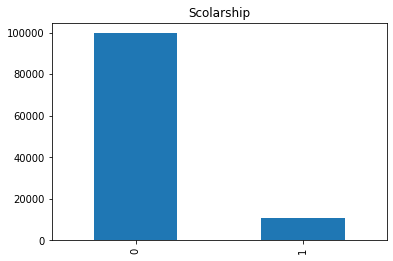

In [ ]:
df['Scholarship'].value_counts().plot.bar(title='Scolarship')

In [ ]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

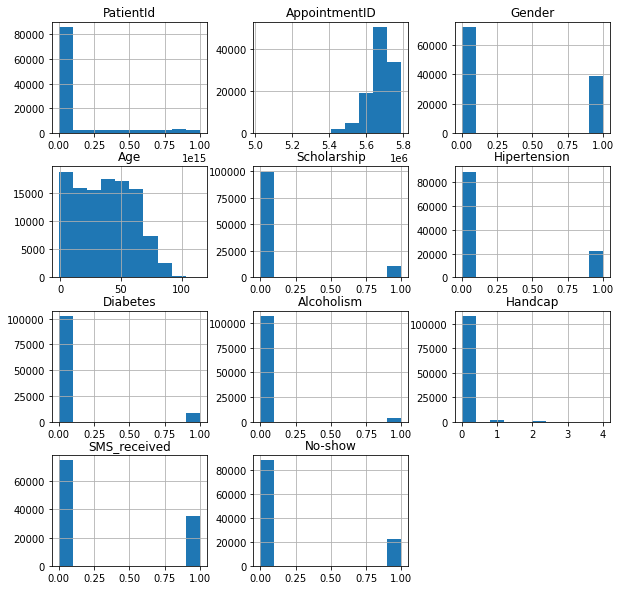

In [ ]:
df.hist(figsize=(10,10));

In [ ]:
df['Age'] = [round(a,-1) for a in df['Age']]                     
df['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11732
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

In [ ]:
import plotly.express as px
fig = px.scatter(df['Age'].value_counts())
fig.show()

In [ ]:
df['PatientId'].astype('int64')
df.set_index('AppointmentID', inplace = True)

In [ ]:

#   How many times he books an appointment
df['PreviousApp'] = df.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()  



# How many times he booked an appointment and didn't come
df['PreviousNoShow'] = (df[df['PreviousApp'] > 0].sort_values(['PatientId', 'ScheduledDay']).groupby(['PatientId'])
['No-show'].cumsum() / df[df['PreviousApp'] > 0]['PreviousApp'])

In [ ]:
print(df['PreviousApp'])

AppointmentID
5642903    1
5642503    1
5642549    1
5642828    1
5642494    0
          ..
5651768    1
5650093    2
5630692    0
5630323    0
5629448    1
Name: PreviousApp, Length: 110527, dtype: int64


In [ ]:
print(df['PreviousNoShow'])

AppointmentID
5642903    0.0
5642503    0.0
5642549    0.0
5642828    0.0
5642494    NaN
          ... 
5651768    0.0
5650093    0.0
5630692    NaN
5630323    NaN
5629448    0.0
Name: PreviousNoShow, Length: 110527, dtype: float64


In [ ]:
df['PreviousNoShow'] = df['PreviousNoShow'].fillna(0)
df['PreviousNoShow']

AppointmentID
5642903    0.0
5642503    0.0
5642549    0.0
5642828    0.0
5642494    0.0
          ... 
5651768    0.0
5650093    0.0
5630692    0.0
5630323    0.0
5629448    0.0
Name: PreviousNoShow, Length: 110527, dtype: float64

In [ ]:
# Number of Appointments Missed by Patient
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())
df['Num_App_Missed']

AppointmentID
5642903    0
5642503    0
5642549    0
5642828    0
5642494    0
          ..
5651768    1
5650093    1
5630692    0
5630323    0
5629448    0
Name: Num_App_Missed, Length: 110527, dtype: int64

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay']

AppointmentID
5642903   2016-04-29
5642503   2016-04-29
5642549   2016-04-29
5642828   2016-04-29
5642494   2016-04-29
             ...    
5651768   2016-05-03
5650093   2016-05-03
5630692   2016-04-27
5630323   2016-04-27
5629448   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay']

AppointmentID
5642903   2016-04-29
5642503   2016-04-29
5642549   2016-04-29
5642828   2016-04-29
5642494   2016-04-29
             ...    
5651768   2016-06-07
5650093   2016-06-07
5630692   2016-06-07
5630323   2016-06-07
5629448   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [ ]:
df['Day_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Day_diff'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

In [ ]:
import plotly.express as px
fig = px.scatter(df['Day_diff'].unique(),color=df['Day_diff'].unique())
fig.show()

In [ ]:
# df = df[(df.Age >= 0)]
df = df[(df.Age >= 0) & (df.Age <= 100)]

In [ ]:
# drop columns after taking important info from them
df.drop(['ScheduledDay'], axis=1, inplace=True)
df.drop(['AppointmentDay'], axis=1, inplace=True)
df.drop('PatientId', axis=1,inplace = True)
df.drop('Neighbourhood', axis=1,inplace = True)

In [ ]:
#Convert to Categorical
df['Handcap'] = pd.Categorical(df['Handcap'])
print(df['Handcap'])

AppointmentID
5642903    0
5642503    0
5642549    0
5642828    0
5642494    0
          ..
5651768    0
5650093    0
5630692    0
5630323    0
5629448    0
Name: Handcap, Length: 110522, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]


In [ ]:
#Convert to Dummy Variables
Handicap = pd.get_dummies(df['Handcap'], prefix = 'Handicap')
df = pd.concat([df, Handicap], axis=1)
df.drop(['Handcap'], axis=1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 5642903 to 5629448
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          110522 non-null  int64  
 1   Age             110522 non-null  int64  
 2   Scholarship     110522 non-null  int64  
 3   Hipertension    110522 non-null  int64  
 4   Diabetes        110522 non-null  int64  
 5   Alcoholism      110522 non-null  int64  
 6   SMS_received    110522 non-null  int64  
 7   No-show         110522 non-null  int64  
 8   PreviousApp     110522 non-null  int64  
 9   PreviousNoShow  110522 non-null  float64
 10  Num_App_Missed  110522 non-null  int64  
 11  Day_diff        110522 non-null  int64  
 12  Handicap_0      110522 non-null  uint8  
 13  Handicap_1      110522 non-null  uint8  
 14  Handicap_2      110522 non-null  uint8  
 15  Handicap_3      110522 non-null  uint8  
 16  Handicap_4      110522 non-null  uint8  
dtypes: 

# ML Models

In [ ]:
X_input = df.drop(columns=['No-show'])
y = df['No-show']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X_input)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)



print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('-------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (77365, 16)
y_train: (77365,)
-------------------------
X_test: (33157, 16)
y_test: (33157,)


### KNN classification model

In [ ]:
# Train a KNN classification model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params= {'weights' : ('uniform', 'distance'), 'n_neighbors':[60,70,80,90,100]}
clf = GridSearchCV(KNN, params)
clf.fit(X_train , y_train)
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013607,0.000870,16.449360,1.087231,60,uniform,"{'n_neighbors': 60, 'weights': 'uniform'}",0.908874,0.909067,0.902346,0.911976,0.907710,0.907995,0.003155,6
1,0.013219,0.000718,15.954417,1.327072,60,distance,"{'n_neighbors': 60, 'weights': 'distance'}",0.934531,0.933045,0.928585,0.936147,0.934273,0.933316,0.002564,1
2,0.010419,0.001260,16.004552,0.924593,70,uniform,"{'n_neighbors': 70, 'weights': 'uniform'}",0.905319,0.906418,0.900213,0.910554,0.904608,0.905422,0.003321,7
3,0.009898,0.000304,15.678503,0.882906,70,distance,"{'n_neighbors': 70, 'weights': 'distance'}",0.933626,0.932786,0.927939,0.936018,0.932657,0.932605,0.002627,2
4,0.010022,0.000855,16.001056,0.921055,80,uniform,"{'n_neighbors': 80, 'weights': 'uniform'}",0.902734,0.903962,0.898598,0.907258,0.900407,0.902592,0.002980,8
5,0.012401,0.003863,15.912338,0.934815,80,distance,"{'n_neighbors': 80, 'weights': 'distance'}",0.933949,0.932140,0.927293,0.935371,0.932657,0.932282,0.002734,3
6,0.009783,0.000389,16.021782,0.922278,90,uniform,"{'n_neighbors': 90, 'weights': 'uniform'}",0.898533,0.900407,0.895819,0.901894,0.897563,0.898843,0.002128,9
7,0.009751,0.000127,15.728136,0.928395,90,distance,"{'n_neighbors': 90, 'weights': 'distance'}",0.934014,0.931623,0.926517,0.934531,0.931429,0.931623,0.002838,4
8,0.009591,0.000342,16.046670,0.939310,100,uniform,"{'n_neighbors': 100, 'weights': 'uniform'}",0.896206,0.896529,0.893298,0.898727,0.895819,0.896116,0.001733,10
9,0.010663,0.001437,15.723068,0.881158,100,distance,"{'n_neighbors': 100, 'weights': 'distance'}",0.933303,0.931494,0.925871,0.934854,0.930977,0.931300,0.003042,5


In [ ]:
clf.best_score_

0.9333160990111808

In [ ]:
clf.best_params_

{'n_neighbors': 60, 'weights': 'distance'}

In [ ]:
from sklearn.metrics import accuracy_score
best_KNN = KNeighborsClassifier(weights='distance',n_neighbors=60)
best_KNN.fit(X_train , y_train)
y_pred_test = best_KNN.predict(X_test) 
KNN_acc = accuracy_score(y_test, y_pred_test)
print(KNN_acc)

0.9365744789938776


### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=0 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 500) 
 # we will use GridSearch
rf.fit(X_train_rs , y_train_rs)

RandomForestClassifier(max_features='sqrt', n_estimators=500, random_state=0)

In [ ]:
y_pred_rs = rf.predict(X_test_rs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



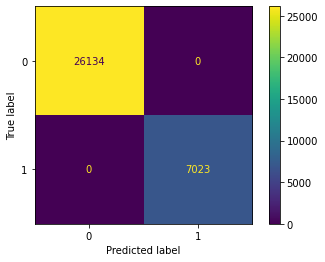

In [ ]:
#Ploting confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_rs, y_pred_rs) 

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Cmatrix = confusion_matrix(y_test_rs, y_pred_rs)
print(Cmatrix)

[[25652   853]
 [  482  6170]]


In [ ]:
RF_acc = accuracy_score(y_test_rs, y_pred_rs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rs, y_pred_rs))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     26505
           1       0.88      0.93      0.90      6652

    accuracy                           0.96     33157
   macro avg       0.93      0.95      0.94     33157
weighted avg       0.96      0.96      0.96     33157



### Decision Trees


In [ ]:
# Spliting data into training set and testing set for DT
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train_dt , y_train_dt)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test_dt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



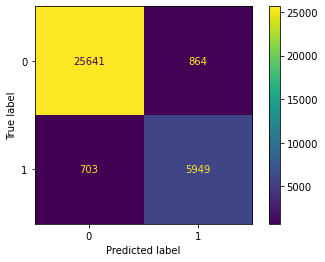

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_dt, X_test_dt, y_test_dt) 

In [ ]:
DT_acc = accuracy_score(y_test_dt, y_pred_dt)

In [ ]:
# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_dt, y_pred_dt))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26505
           1       0.87      0.89      0.88      6652

    accuracy                           0.95     33157
   macro avg       0.92      0.93      0.93     33157
weighted avg       0.95      0.95      0.95     33157



### Logistic Regression.


In [ ]:
from sklearn.model_selection import train_test_split
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:

### Logistic regrission
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_lg = LogisticRegression().fit(X_train_lg, y_train_lg)
y_pred_lg = model_lg.predict(X_test_lg)
acc_lg = model_lg.score(X_train_lg, y_train_lg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



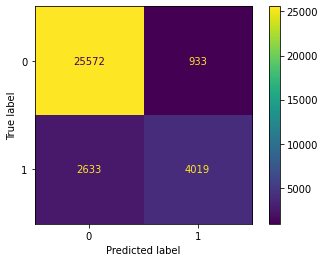

In [ ]:
# Ploting confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_lg, X_test_lg, y_test_lg) 

In [ ]:
LG_acc = accuracy_score(y_test_lg, y_pred_lg)

In [ ]:
# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred_lg))



              precision    recall  f1-score   support

           0       0.91      0.96      0.93     26505
           1       0.81      0.60      0.69      6652

    accuracy                           0.89     33157
   macro avg       0.86      0.78      0.81     33157
weighted avg       0.89      0.89      0.89     33157



### Support Vector Machine.

In [ ]:
# Spliting data into training set and testing set 
from sklearn.model_selection import train_test_split
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
SVC_model = make_pipeline(StandardScaler(),SVC(gamma='auto'))
SVC_model.fit(X_train_sv, y_train_sv)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
# Predicting the Test set results
y_pred_sv = SVC_model.predict(X_test_sv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



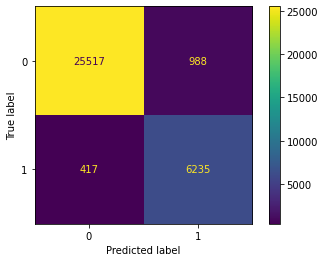

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVC_model, X_test_sv, y_test_sv) 

In [ ]:
SV_acc = accuracy_score(y_test_sv, y_pred_sv)

In [ ]:

# Accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test_sv, y_pred_sv))



              precision    recall  f1-score   support

           0       0.98      0.96      0.97     26505
           1       0.86      0.94      0.90      6652

    accuracy                           0.96     33157
   macro avg       0.92      0.95      0.94     33157
weighted avg       0.96      0.96      0.96     33157



# Conclusion

In [ ]:
!pip3 install tabulate
from tabulate import tabulate

In [ ]:
tab= tabulate([["Model","Accuracy"],["KNN",KNN_acc*100],["Random Forest Classifier",RF_acc*100],['Decision Tree',
                DT_acc*100],['logestic regression',LG_acc*100],['Support Vector classifier',SV_acc*100]],
              headers="firstrow")
print(tab)

Model                        Accuracy
-------------------------  ----------
KNN                           93.6574
Random Forest Classifier      95.9737
Decision Tree                 95.274
logestic regression           89.2451
Support Vector classifier     95.7626


# best  models are **Support Vector Classifier** and **Random Forest Classifier** with acc **96%**